In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# create a common alpha
alpha =  0.003/10

# zTest Function
def zTest(df,df1,df2,column, alpha):
    z, p = sms.weightstats.ztest(df1[column],df2[column],alternative ='two-sided', usevar='pooled')
    print('Z statistic: ', round(z,3))
    print('Probablility they have same vpg: ', round(p,5))
    print('Standard Error of All VPG: ', round(stats.sem(df[column]),3))
    print('Range of Difference in VPG: ',smss.CompareMeans(smss.DescrStatsW(df1[column]),smss.DescrStatsW(df2[column])).tconfint_diff(usevar='pooled', alpha =alpha))

# list diffence function   
def listDiff(first, second):
    second = set(second)
    return [item for item in first if item not in second]

In [3]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [4]:
#Set TourID to index
df= df.set_index('TourID_dimension')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14445 entries, 146456 to 381090
Data columns (total 11 columns):
Age                           14445 non-null int64
AgentLine                     14445 non-null object
BookingWindow                 14445 non-null object
FirstGenVsOwner               14445 non-null object
HHIncomeRanges                14445 non-null object
Homeowner                     14445 non-null object
InState                       14445 non-null object
Programs (Budget)             14445 non-null object
relationStatus                14445 non-null object
ResultOfTour                  14445 non-null object
NetVolumePlusNonGoodVolume    14445 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB
None


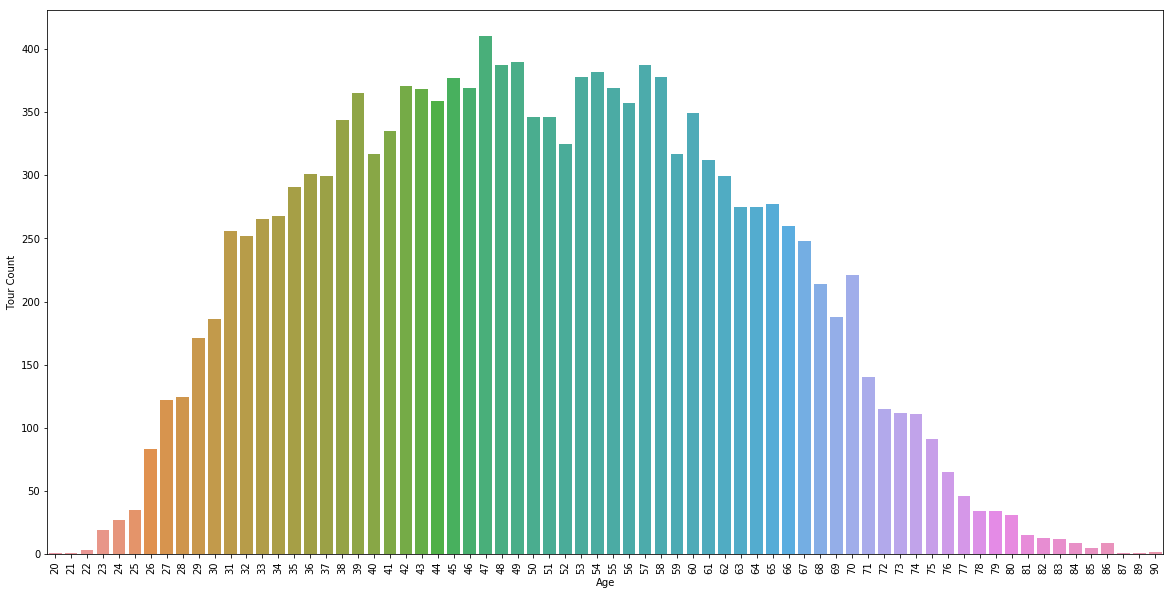

Millenials vs Other Generations Differences in VPG
Z statistic:  -6.231
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-3503.7421583933647, -930.3996197343101)

Gen X vs Other Generations Differences in VPG
Z statistic:  2.118
Probablility they have same vpg:  0.03417
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-424.8271695088713, 1626.0208533913426)

Baby Boomers vs Other Generations Differences in VPG
Z statistic:  3.784
Probablility they have same vpg:  0.00015
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (48.18590641660876, 2127.531385137507)

Silent Gen vs Other Generations Differences in VPG
Z statistic:  -2.21
Probablility they have same vpg:  0.02712
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-4086.6606679253237, 986.5361331723998)



In [5]:
#increase  figure size
mpl.rcParams['figure.figsize'] = (20,10)

sns.countplot(x= 'Age', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.show()

dfMillenials = df[df.Age < 38]
dfNotMillenials = df[df.Age >= 38]

print('Millenials vs Other Generations Differences in VPG')
zTest(df,dfMillenials,dfNotMillenials, 'NetVolumePlusNonGoodVolume', alpha)
print()

dfGenX = df[(df.Age >= 38) & (df.Age < 54 )]
dfNotGenX = df[(df.Age < 38) | (df.Age >= 54)]

print('Gen X vs Other Generations Differences in VPG')
zTest(df,dfGenX,dfNotGenX, 'NetVolumePlusNonGoodVolume', alpha)
print()

dfBB = df[(df.Age >= 54) & (df.Age < 73 )]
dfNotBB = df[(df.Age < 54) | (df.Age >= 73)]

print('Baby Boomers vs Other Generations Differences in VPG')
zTest(df,dfBB,dfNotBB, 'NetVolumePlusNonGoodVolume', alpha)
print()

dfSG = df[(df.Age >= 73) ]
dfNotSG = df[(df.Age < 73)]

print('Silent Gen vs Other Generations Differences in VPG')
zTest(df,dfSG,dfNotSG, 'NetVolumePlusNonGoodVolume', alpha)
print()

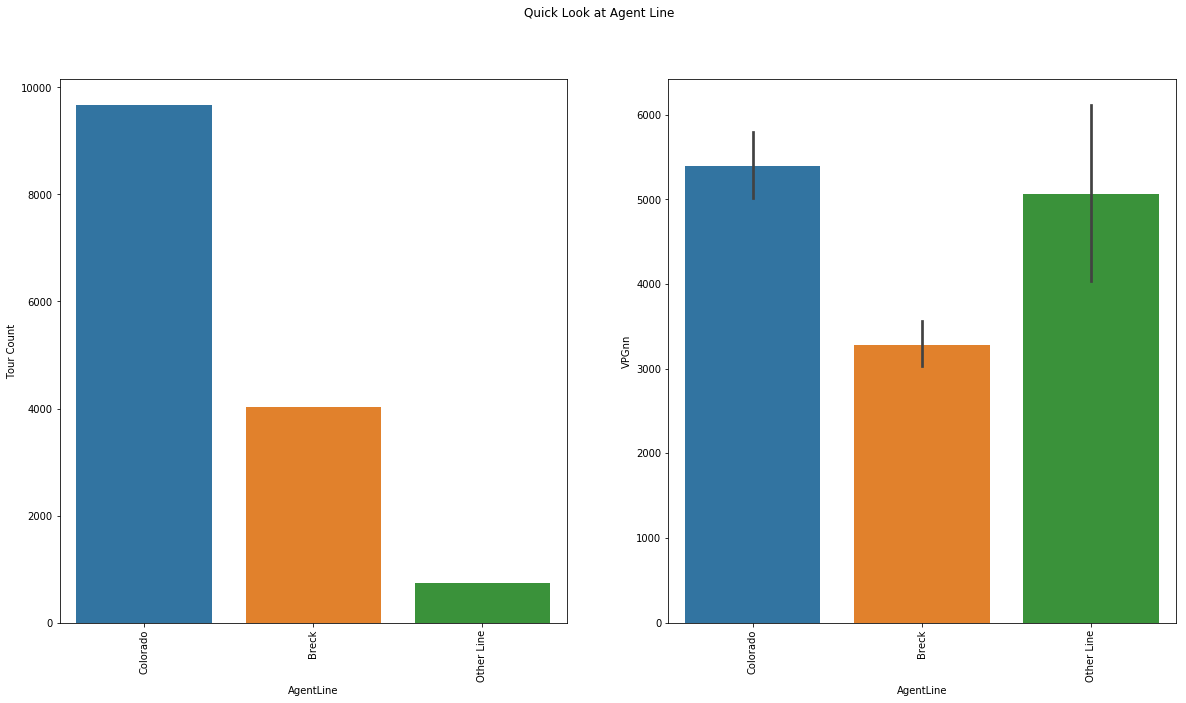

Colorado vs Breck and Other Lines Differences in VPG
Z statistic:  6.211
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (765.7977708849094, 2900.181675207429)

Breck vs Colorado and Other Lines Differences in VPG
Z statistic:  -6.743
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-3205.3616532683886, -967.4760400498367)


In [6]:
plt.subplot(1,2,1)
sns.countplot(x= 'AgentLine', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x= 'AgentLine', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Agent Line')
plt.show()

#Colorado Line Versus Other Line z test
dfColorado = df[df.AgentLine == 'Colorado']
dfNotColorado = df[(df.AgentLine == 'Breck') | (df.AgentLine == 'Other Line')]
dfBreck = df[df.AgentLine == 'Breck']
dfNotBreck = df[(df.AgentLine == 'Colorado') | (df.AgentLine == 'Other Line')]

print('Colorado vs Breck and Other Lines Differences in VPG')
zTest(df,dfColorado,dfNotColorado, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Breck vs Colorado and Other Lines Differences in VPG')
zTest(df,dfBreck,dfNotBreck, 'NetVolumePlusNonGoodVolume', alpha)

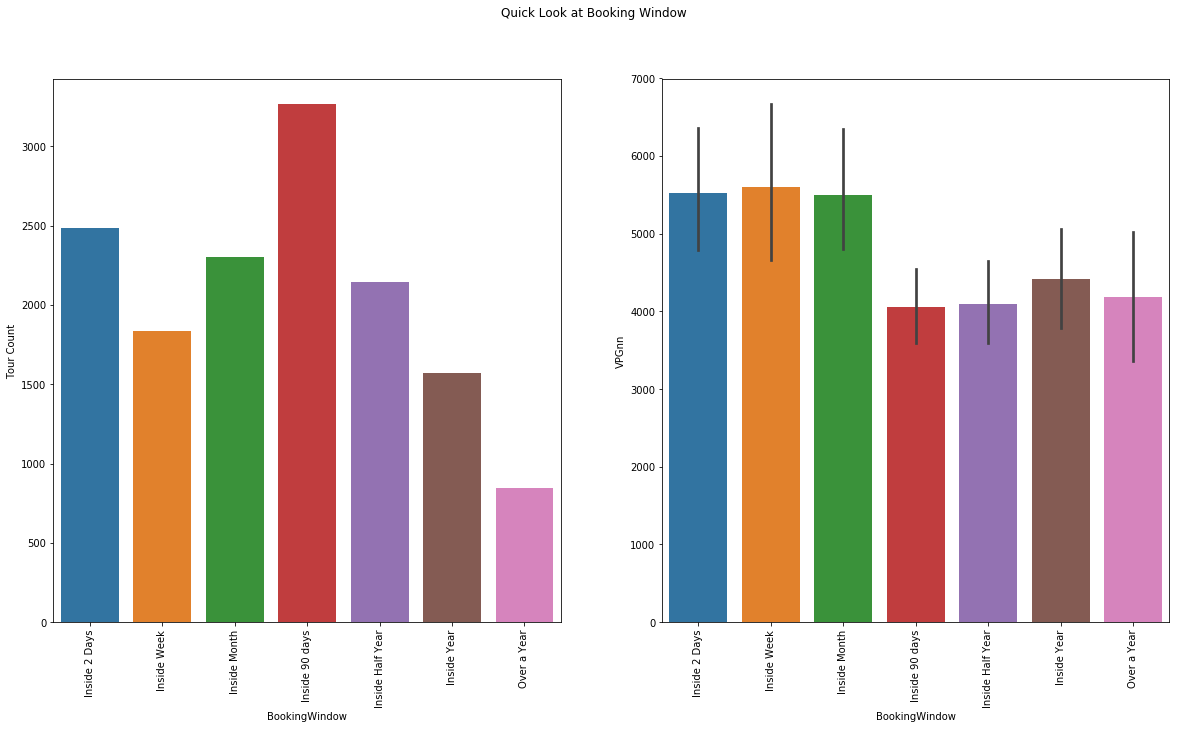

Booked Inside a Week vs Booked Ouside a Week Differences in VPG
Z statistic:  3.618
Probablility they have same vpg:  0.0003
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (0.5126779963877652, 2194.543605963111)

Booked Inside a Month vs Booked Ouside a Month Differences in VPG
Z statistic:  4.963
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (375.35186554774634, 2390.839497081258)

Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG
Z statistic:  2.76
Probablility they have same vpg:  0.00579
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-256.09779127925844, 1906.0077399576255)


In [7]:
plt.subplot(1,2,1)
sns.countplot(x= 'BookingWindow', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'BookingWindow',y = 'NetVolumePlusNonGoodVolume', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Booking Window')
plt.show()

#Booked within a month Versus booked outside a month z test
dfInsideMonth = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')]
dfOutsideMonth = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

#Booked within a week Versus booked outside a week z test
dfInsideWeek = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')]
dfOutsideWeek = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')|(df.BookingWindow == 'Inside Month')]

#Booked within 90 days Versus booked outside 90 days z test
dfInside90 = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')|(df.BookingWindow == 'Inside 90 days')]
dfOutside90 = df[(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]


print('Booked Inside a Week vs Booked Ouside a Week Differences in VPG')
zTest(df,dfInsideWeek,dfOutsideWeek, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Month vs Booked Ouside a Month Differences in VPG')
zTest(df,dfInsideMonth,dfOutsideMonth, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG')
zTest(df,dfInside90,dfOutside90, 'NetVolumePlusNonGoodVolume', alpha)

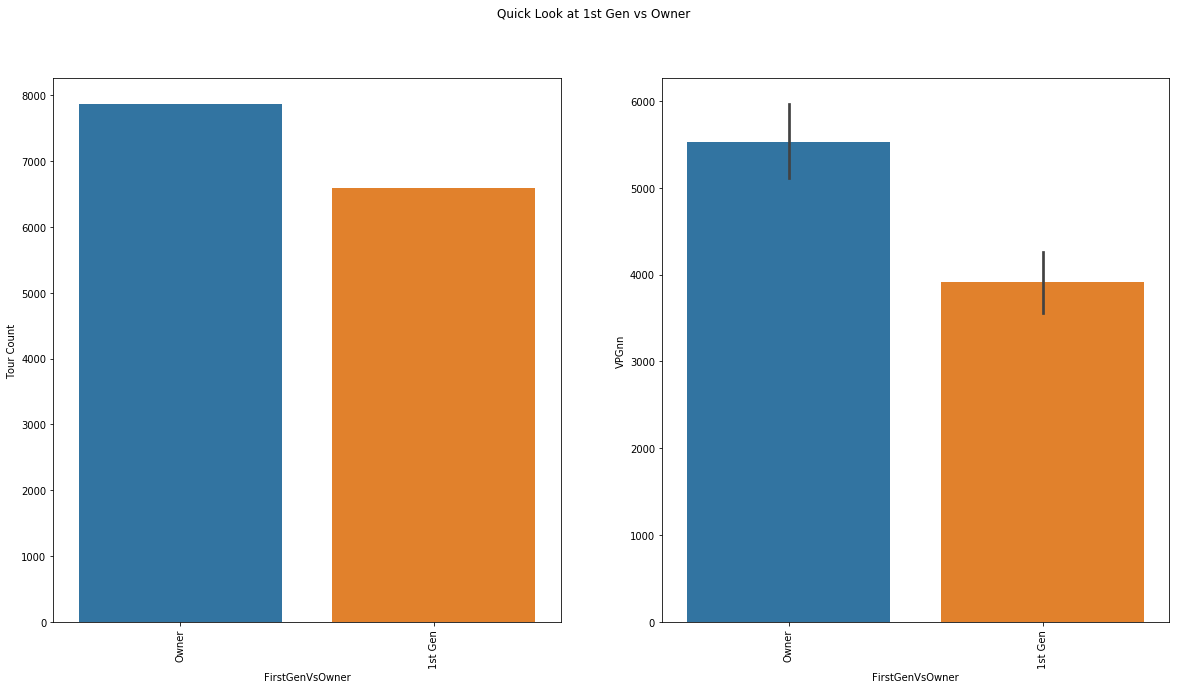

Owner Versus First Gen True Difference in VPG
Z statistic:  5.781
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (603.4722256830802, 2619.312259218693)


In [8]:
plt.subplot(1,2,1)
sns.countplot(x= 'FirstGenVsOwner', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x= 'FirstGenVsOwner',y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at 1st Gen vs Owner')
plt.show()

#bgv owner vs first gen z test
dfOwner = df[df.FirstGenVsOwner == 'Owner']
dfFirstGen = df[df.FirstGenVsOwner == '1st Gen']

print('Owner Versus First Gen True Difference in VPG')
zTest(df,dfOwner,dfFirstGen, 'NetVolumePlusNonGoodVolume', alpha)

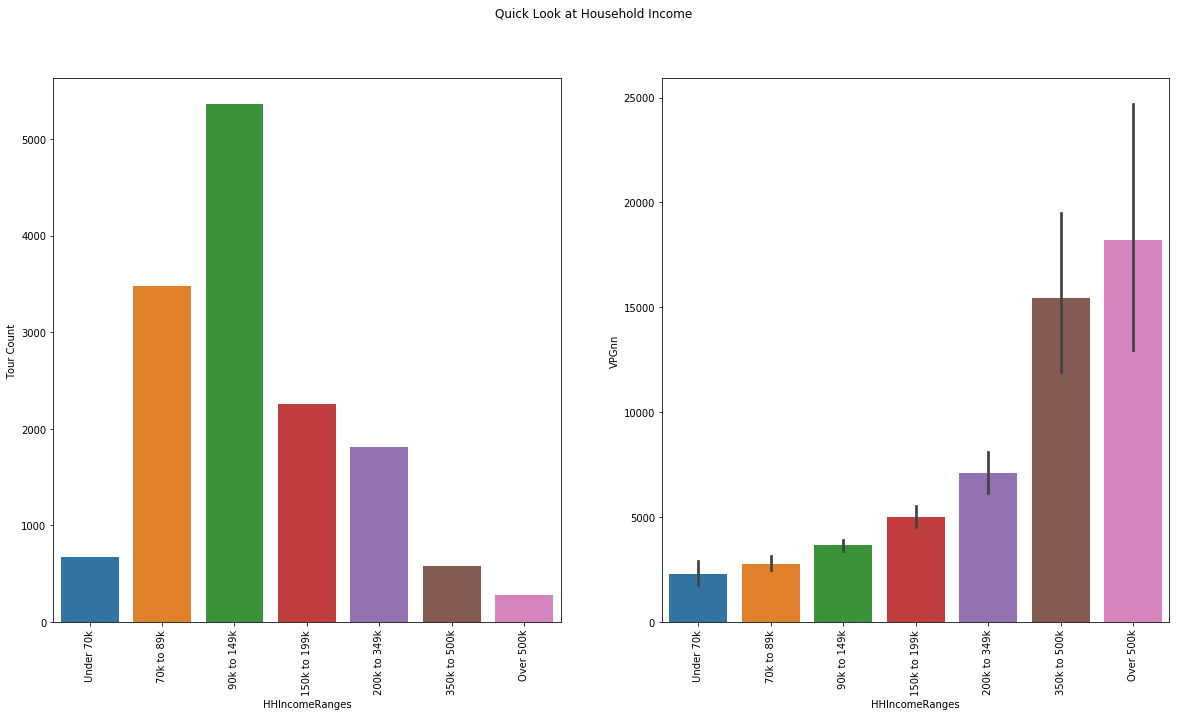

HHI over 350k vs HHI Under 350k Differences in VPG
Z statistic:  21.23
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (10193.010908288852, 14378.257724167997)



In [9]:
plt.subplot(1,2,1)
sns.countplot(x= 'HHIncomeRanges', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Household Income')
plt.show()

#HHI over 350 Versus HHI Under 350 days z test
dfNotHHI350 = df[(df.HHIncomeRanges == 'Under 70k')|(df.HHIncomeRanges == '70k to 89k')|(df.HHIncomeRanges == '90k to 149k')|(df.HHIncomeRanges == '150k to 199k')|(df.HHIncomeRanges == '200k to 349k')]
dfHHI350 = df[(df.HHIncomeRanges == '350k to 500k')|(df.HHIncomeRanges == 'Over 500k')]
print('HHI over 350k vs HHI Under 350k Differences in VPG')
zTest(df,dfHHI350,dfNotHHI350, 'NetVolumePlusNonGoodVolume', alpha)
print()

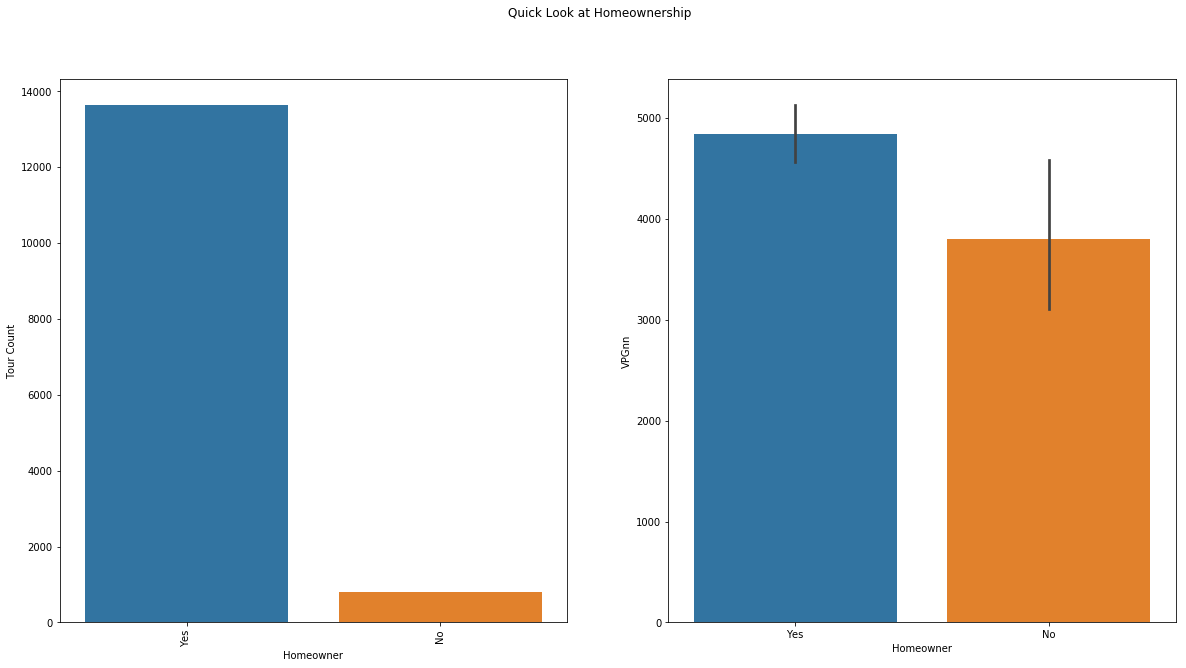

Homeowner Versus Non Homeowner True Difference in VPG
Z statistic:  1.725
Probablility they have same vpg:  0.0845
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-1148.2008139871627, 3243.2152906637443)


In [10]:
plt.subplot(1,2,1)
sns.countplot(x= 'Homeowner', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(y= 'NetVolumePlusNonGoodVolume', x='Homeowner', data= df)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Homeownership')
plt.show()

#homeowner z test
dfHY = df[df.Homeowner == 'Yes']
dfHN = df[df.Homeowner == 'No']

print('Homeowner Versus Non Homeowner True Difference in VPG')
zTest(df,dfHY,dfHN, 'NetVolumePlusNonGoodVolume', alpha)

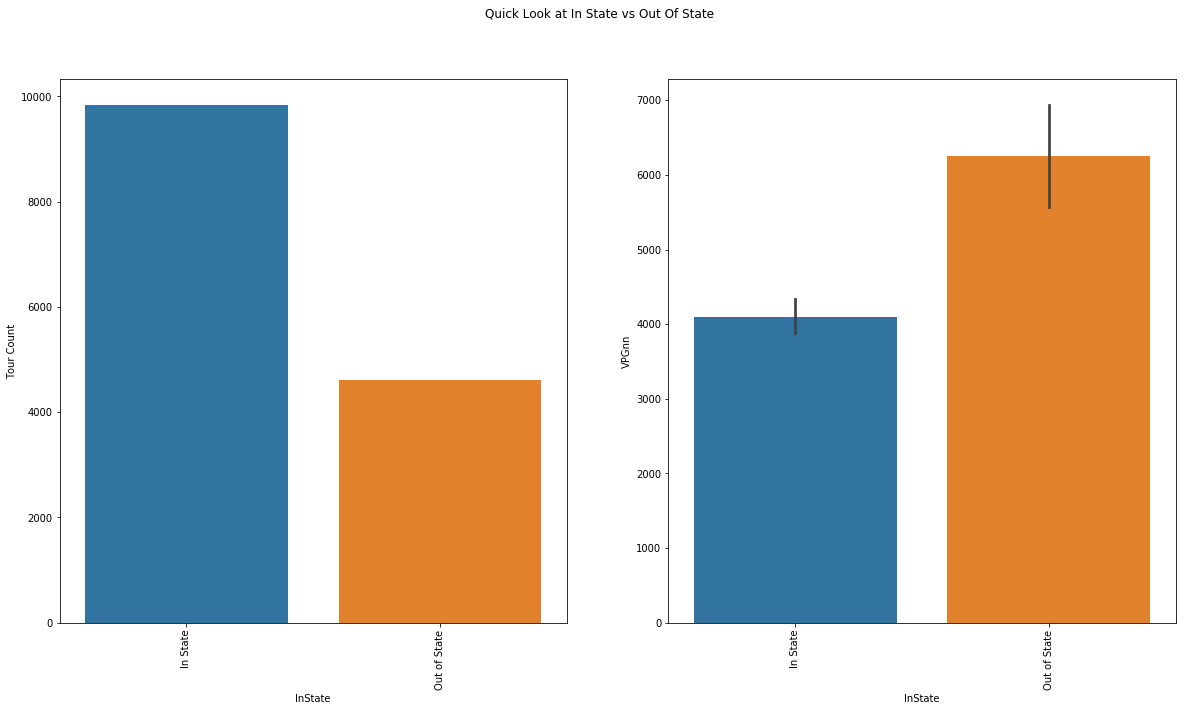

In State Versus Out of State True Difference in VPG
Z statistic:  -7.25
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-3234.360713992482, -1081.5280749065355)


In [11]:
# instate quick look
plt.subplot(1,2,1)
sns.countplot(x= 'InState', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'InState', y='NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at In State vs Out Of State')
plt.show()


#in state vs out of state status z test
dfIn = df[df.InState == 'In State']
dfOut = df[df.InState == 'Out of State']

print('In State Versus Out of State True Difference in VPG')
zTest(df,dfIn,dfOut, 'NetVolumePlusNonGoodVolume', alpha)

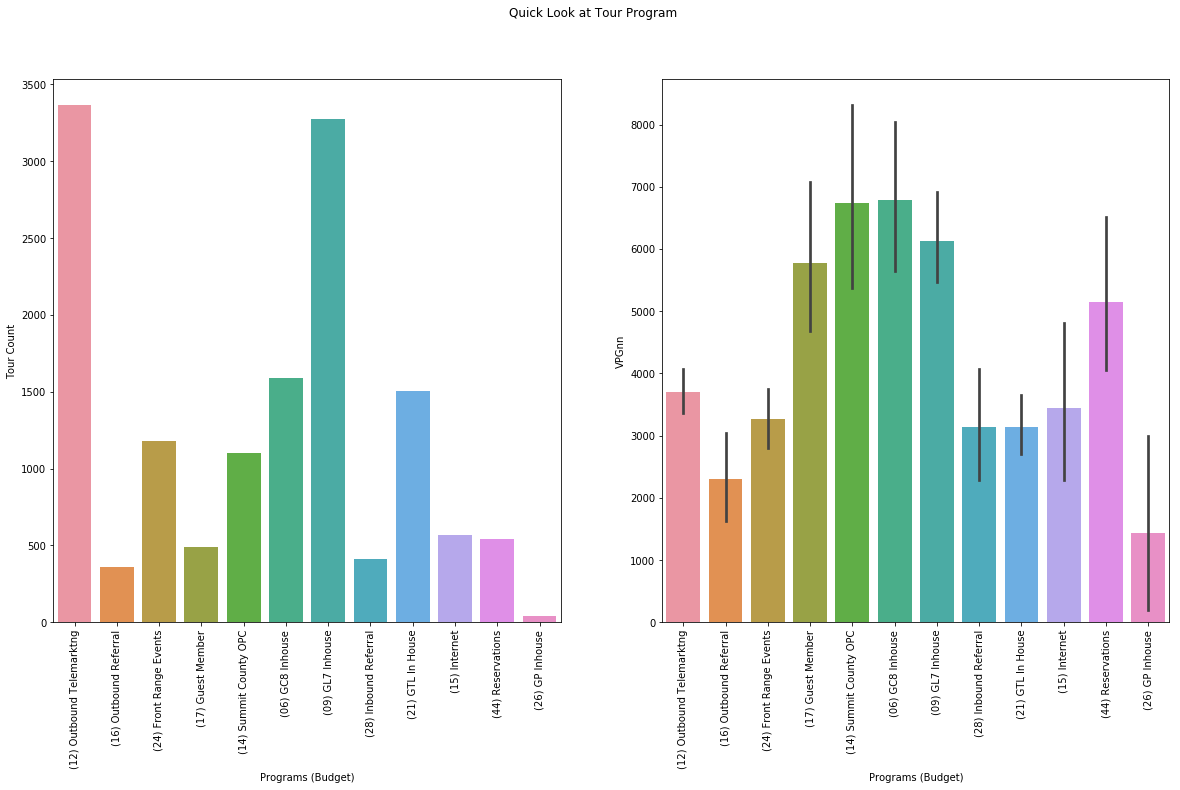

Inhouse programs  vs Non inhouse programs differnce in vpg
Z statistic:  5.43
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (504.06881125499103, 2514.2325566812638)



In [12]:
plt.subplot(1,2,1)
sns.countplot(x= 'Programs (Budget)', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'Programs (Budget)', y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Tour Program')
plt.show()

#Inhouse programs  vs Non inhouse differnce in vpg z test
dfInhouse = df[(df['Programs (Budget)']=='(06) GC8 Inhouse')|(df['Programs (Budget)']=='(21) GTL In House')|(df['Programs (Budget)']=='(26) GP Inhouse')|(df['Programs (Budget)']=='(09) GL7 Inhouse')|(df['Programs (Budget)']=='(17) Guest Member')]
dfNotInhouse = df[(df['Programs (Budget)']=='(12) Outbound Telemarktng')|(df['Programs (Budget)']=='(16) Outbound Referral')|(df['Programs (Budget)']=='(24) Front Range Events')|(df['Programs (Budget)']=='(14) Summit County OPC')|(df['Programs (Budget)']=='(28) Inbound Referral')|(df['Programs (Budget)']=='(15) Internet')|(df['Programs (Budget)']=='(44) Reservations')]

print('Inhouse programs  vs Non inhouse programs differnce in vpg')
zTest(df,dfInhouse,dfNotInhouse, 'NetVolumePlusNonGoodVolume', alpha)
print()

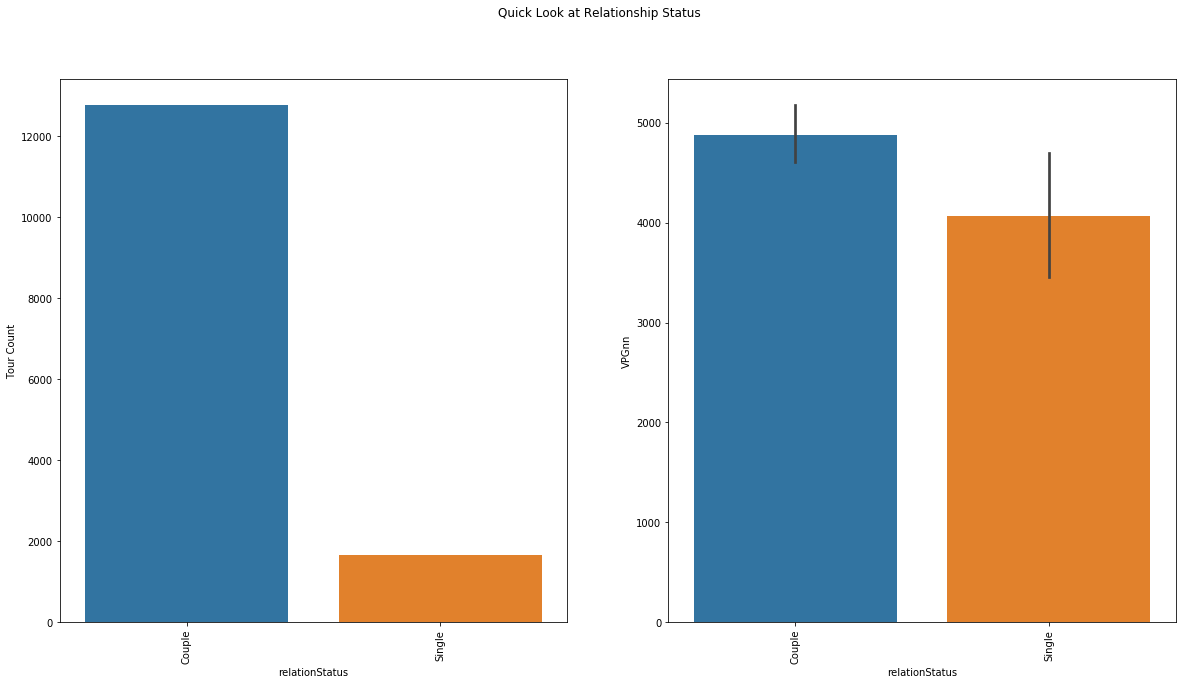

Couples Versus Singles Difference in VPG
Z statistic:  1.852
Probablility they have same vpg:  0.06404
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-769.3390107663724, 2384.3751158269606)


In [13]:
# relationship status quick look
plt.subplot(1,2,1)
sns.countplot(x= 'relationStatus', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'relationStatus', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Relationship Status')
plt.show()


#relationship status z test
dfCouple = df[df.relationStatus == 'Couple']
dfSingle = df[df.relationStatus == 'Single']

print('Couples Versus Singles Difference in VPG')
zTest(df,dfCouple,dfSingle, 'NetVolumePlusNonGoodVolume', alpha)

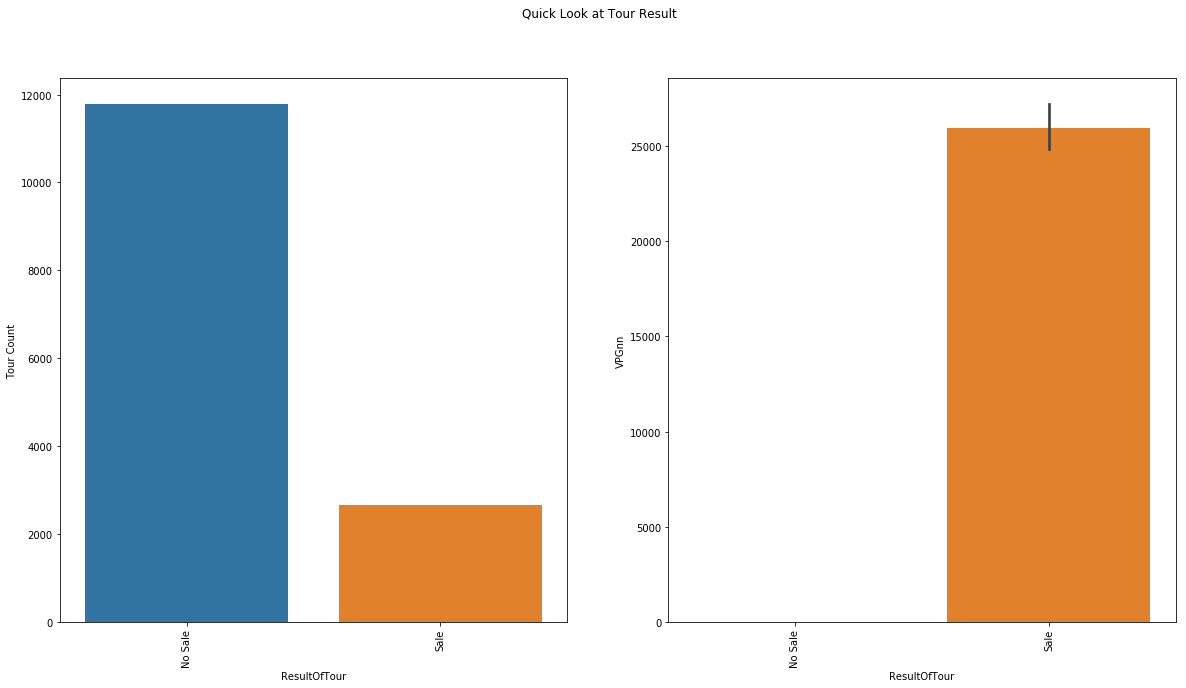

In [14]:
plt.subplot(1,2,1)
sns.countplot(x= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'ResultOfTour', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Tour Result')
plt.show()

In [15]:
print(df.columns)

Index(['Age', 'AgentLine', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus', 'ResultOfTour', 'NetVolumePlusNonGoodVolume'],
      dtype='object')


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from imblearn.over_sampling import SMOTE 


dfX = df.drop(['ResultOfTour', 'NetVolumePlusNonGoodVolume', 'AgentLine'], axis = 1)
dfX = pd.get_dummies(dfX, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])

dfX2 = dfX

dic = {'No Sale':0, 'Sale':1}
dfY = df['ResultOfTour'].replace(dic)
dfY2 = df['NetVolumePlusNonGoodVolume']

sm = SMOTE(random_state=42)
dfX1, dfY1 = sm.fit_sample(dfX, dfY)
dfX1= pd.DataFrame(dfX1, columns = dfX2.columns)
dfY1= pd.DataFrame(dfY1)

print(dfX1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23566 entries, 0 to 23565
Data columns (total 35 columns):
Age                                            23566 non-null float64
BookingWindow_Inside 2 Days                    23566 non-null float64
BookingWindow_Inside 90 days                   23566 non-null float64
BookingWindow_Inside Half Year                 23566 non-null float64
BookingWindow_Inside Month                     23566 non-null float64
BookingWindow_Inside Week                      23566 non-null float64
BookingWindow_Inside Year                      23566 non-null float64
BookingWindow_Over a Year                      23566 non-null float64
FirstGenVsOwner_1st Gen                        23566 non-null float64
FirstGenVsOwner_Owner                          23566 non-null float64
HHIncomeRanges_150k to 199k                    23566 non-null float64
HHIncomeRanges_200k to 349k                    23566 non-null float64
HHIncomeRanges_350k to 500k                    2356

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


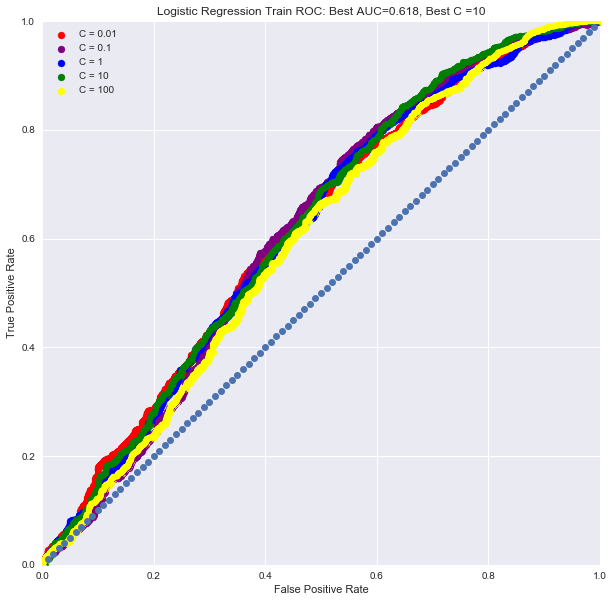

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import brier_score_loss

bestC = 0
bestAUCC = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.01, 0.1, 1,10,100]
kf = StratifiedShuffleSplit(n_splits=5, random_state=42)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    lr = LogisticRegression(C=Cs[i])
    lr.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCC:
        bestC=Cs[i]
        bestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Logistic Regression Train ROC: Best AUC='+str(round(bestAUCC,3))+', Best C ='+str(bestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


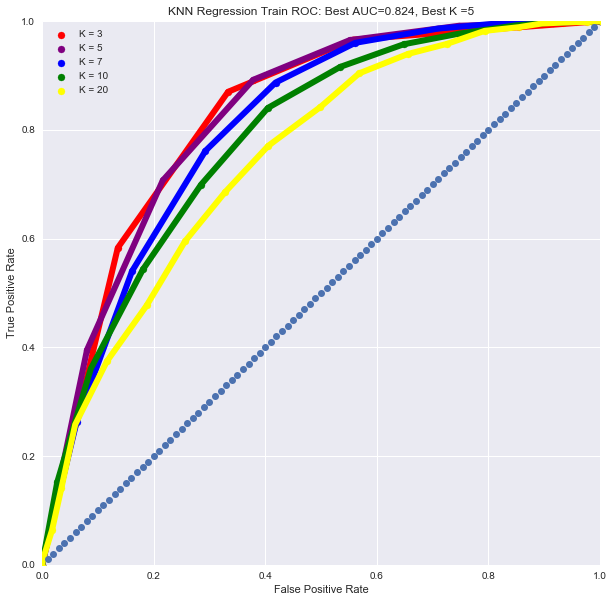

In [18]:
from sklearn.neighbors import KNeighborsClassifier


bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ks = [3,5,7,10,20]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    knn = KNeighborsClassifier(Ks[i])
    knn.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = knn.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=Ks[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\U

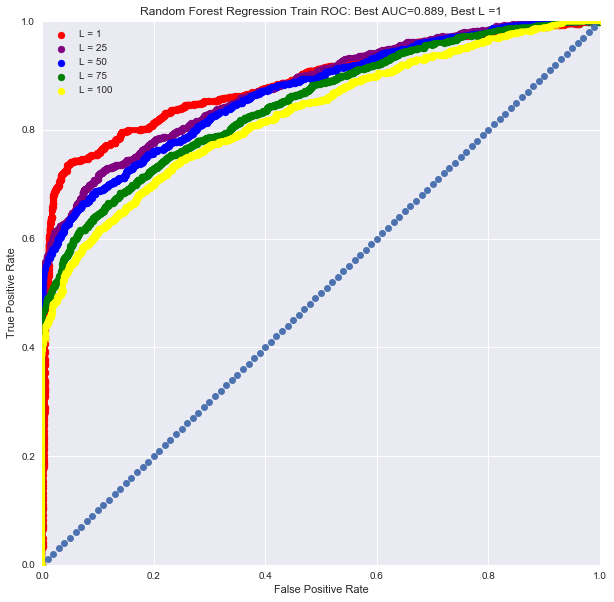

In [19]:
from sklearn.ensemble import RandomForestClassifier

bestL = 0
bestAUCL = 0
bestFeatureImportances= []
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ls = [1,25,50,75,100]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    rfr = RandomForestClassifier(n_estimators=1000,min_samples_leaf=Ls[i])
    rfr.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = rfr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCL:
        bestL=Ls[i]
        bestAUCL=auc
        bestFeatureImportances = rfr.feature_importances_
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='L = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Random Forest Regression Train ROC: Best AUC='+str(round(bestAUCL,3))+', Best L ='+str(bestL))
plt.plot(x,y,'o')
plt.show()

In [20]:
print(bestFeatureImportances)

[0.34561677 0.02367227 0.03208876 0.02595808 0.02962672 0.01844834
 0.02055505 0.012865   0.02206412 0.02239216 0.02646279 0.02725544
 0.01406635 0.04101089 0.03797939 0.00844989 0.01337857 0.01021194
 0.01025409 0.02743447 0.02708923 0.02214413 0.03276926 0.02710462
 0.01245459 0.00827967 0.00870091 0.00683591 0.02062289 0.01216092
 0.0009621  0.0078409  0.01045959 0.01634545 0.01643874]


In [21]:
from sklearn.feature_selection import RFE
i=0
bestF =0
bestAUCF =0
bestMask =[]

Fs = [9,8,7,6,5]


for train, test in kf.split(dfX1,dfY1):
    model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=bestL)
    # create the RFE model and select 3 attributes
    rfe = RFE(model,Fs[i], step =1)
    rfe = rfe.fit(dfX1.iloc[train.tolist()], dfY1.iloc[train.tolist()])
    preds = rfe.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCF:
        bestF=Fs[i]
        bestAUCF=auc
        bestMask = list(df.drop(['NetVolumePlusNonGoodVolume','ResultOfTour'], axis=1).columns[rfe.support_])
        plt.title('Recursive Feature Elimination: Best Number of Features is ' + str(len(bestMask)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'Random Forest RFE ' +str(rfe.n_features_)+' Features AUC = '+str(round(auc,3)))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.plot(x,y,'o')
plt.show()

print('Selected Features: ',bestMask)
print()
print('Not Selected Features:',listDiff(df.drop(['NetVolumePlusNonGoodVolume','ResultOfTour'], axis=1).columns.tolist(),bestMask))

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [22]:
import tabpy_client
# Connect to TabPy server using the client library
connection = tabpy_client.Client('http://localhost:9004/')

In [23]:
# tabpy code


model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=bestL)
model.fit(dfX1,dfY1)

a=0
print('Feature Importances:')
for i in dfX2.columns:
    print(i, ': ', +model.feature_importances_[a])
    a+=1

def isBuyer(Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus):
    
    X = pd.DataFrame(np.column_stack([Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus]), columns =['Age', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    X.Age =X.Age.astype(int)
    
    X = pd.get_dummies(X, columns = None ,prefix=[ 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    
    missing_cols = set( dfX2.columns ) - set( X.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X[c] = 0
    
    # Ensure the order of column in the test set is in the same order than in train set
    X = X[dfX2.columns]
    
    
    print('Probability of Buying:',str(model.predict_proba(X)[:,1]))
    if model.predict(X)== 1:
        return 'Sale'
    else:
        return 'No Sale'


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Feature Importances:
Age :  0.34806164552117036
BookingWindow_Inside 2 Days :  0.02444546677847894
BookingWindow_Inside 90 days :  0.03144495247368302
BookingWindow_Inside Half Year :  0.025581222810287123
BookingWindow_Inside Month :  0.029261503550179393
BookingWindow_Inside Week :  0.018725887867102615
BookingWindow_Inside Year :  0.020431880046423403
BookingWindow_Over a Year :  0.01283757161693035
FirstGenVsOwner_1st Gen :  0.022199545556030417
FirstGenVsOwner_Owner :  0.02175808406195387
HHIncomeRanges_150k to 199k :  0.026472036223159204
HHIncomeRanges_200k to 349k :  0.027020061053614507
HHIncomeRanges_350k to 500k :  0.013629881860507639
HHIncomeRanges_70k to 89k :  0.041028743430571855
HHIncomeRanges_90k to 149k :  0.03735842811462097
HHIncomeRanges_Over 500k :  0.008630496440087575
HHIncomeRanges_Under 70k :  0.013693699643070215
Homeowner_No :  0.010271573623042976
Homeowner_Yes :  0.01030323520547938
InState_In State :  0.02704432898406367
InState_Out of State :  0.0267413

In [24]:
isBuyer(65,'Inside 90 days', '1st Gen', '200k to 349k', 'No', 'In State', '(09) GL7 Inhouse', 'Couple')

Probability of Buying: [0.27118333]


'No Sale'

In [ ]:
# Publish the isBuyer function to TabPy server so it can be used from Tableau
# Using the name DiagnosticsDemo and a short description of what it does
connection.deploy('BuyerPrediction',
                  isBuyer,
                  'Returns prediction of buying based on random forest classifier model trained using clean data from 12/1/16-2/28/2018')

[0.24604243 0.13560943 0.12169766 ... 0.18181351 0.23189585 0.1703381 ]
[0.0838757  0.13280887 0.06965404 ... 0.13267663 0.23031337 0.17933564]
[0.23458855 0.18586381 0.17484649 ... 0.16842161 0.20827604 0.1769572 ]
[0.17686712 0.29151594 0.15138302 ... 0.22367095 0.13891866 0.20135833]
[0.15332503 0.20854741 0.25611158 ... 0.31177584 0.15626237 0.20057034]


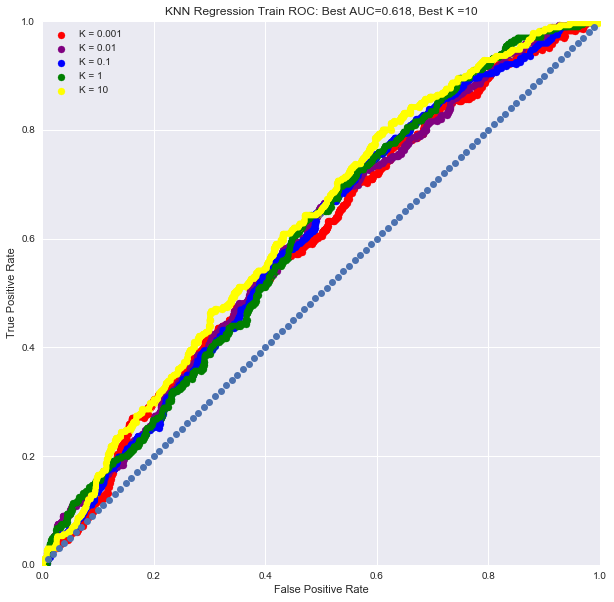

In [25]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge()

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,dfX2,dfY2, cv=5)

bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
As = [0.001,0.01,0.1,1,10]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX,dfY):
    ridge = Ridge(alpha=As[i], normalize=False)
    ridge.fit(dfX.iloc[train.tolist()],dfY.iloc[train.tolist()])
    preds = ridge.predict(dfX.iloc[test.tolist()])
    print(preds)
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=As[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(As[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
bestLR =0
bestAUCRFR=0
i=0
#make cross validation of K values and kfold
Ls = [1,25,50,75,100]
kf = KFold(5)




for train, test in kf.split(dfX2,dfY2):
    rfr = RandomForestRegressor(n_estimators=1000,min_samples_leaf=Ls[i])
    rfr.fit(dfX2.iloc[train.tolist()],dfY2.iloc[train.tolist()])
    preds = rfr.predict(dfX2.iloc[test.tolist()])
    print(metrics.median_absolute_error(dfY2.iloc[test.tolist()],preds))
    i += 1 
    


3570.1879333333327
4523.177919841151
4019.3611975038875
4098.615519970293
4430.462955573234
